In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Data Description

In [2]:
"""
1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This resulted with
	    a training set of 159 instances, which was also used as a test
	    set (minus the actual instance during testing).
	 -- Results: Percent Average Deviation Error of Prediction from Actual
	    -- 11.84% for the IBL algorithm
	    -- 14.12% for the resulting linear regression equation

4. Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   2.             41
   6.             2
   19.            4
   20.            4
   22.            2
   23.            2
   26.            4
"""
print("imports-85.names")

imports-85.names


In [3]:
# imports-85.data
# 

columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", 
           "length", "width", "height", "curb-weight", "engine-type", 
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", 
           "compression-ratio", "hoursepower", "peak-rpm", "city-mpg", "highway-mpg", 
           "price"]

df = pd.read_csv('./imports-85.data', names=columns, na_values='?')
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
symboling            159 non-null int64
normalized-losses    159 non-null float64
make                 159 non-null object
fuel-type            159 non-null object
aspiration           159 non-null object
num-of-doors         159 non-null object
body-style           159 non-null object
drive-wheels         159 non-null object
engine-location      159 non-null object
wheel-base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
curb-weight          159 non-null int64
engine-type          159 non-null object
num-of-cylinders     159 non-null object
engine-size          159 non-null int64
fuel-system          159 non-null object
bore                 159 non-null float64
stroke               159 non-null float64
compression-ratio    159 non-null float64
hoursepower          159 non-

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,hoursepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


## 1.2 Linear Regression(engine-size vs city-mpg)

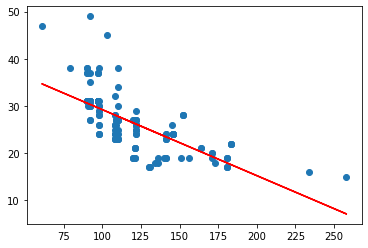

In [6]:
# y = "city-mpg"
# x = "engine-size"
def LEARN_SIMPLE_LINREG(data):
    
    m_x, m_y = data.mean(axis=0)
    numerator = 0
    denominator = 0
    for i in range(len(data)):
        numerator += (data[i,0]-m_x)*(data[i,1]-m_y)
        denominator += (data[i,0]-m_x)**2
    
    beta1 = numerator/denominator
    beta0 = m_y - beta1*m_x
    
    return beta0, beta1

def PREDICT_SIMPLE_LINREG(x, beta0, beta1):
    
    y_pred = beta0 + beta1*x
    
    return y_pred

A = df[["engine-size", "city-mpg"]].to_numpy()
b0, b1 = LEARN_SIMPLE_LINREG(A)
y_prediction = PREDICT_SIMPLE_LINREG(A[:,0], b0, b1)

plt.scatter(A[:,0],A[:,1])
plt.plot(A[:,0], y_prediction, 'r')

## 1.3 Split the data into train(80%) and test(20%) sets

First of all, the row data are shuffled in order to eliminate the potential of biases or patterns by sample(frac=1). Next, we can split the data into train(x_train, y_train) and test(x_test, y_test) sets. to,numpy() is to convert the dataframe into the numpy array for matrix calculations.

In [7]:
features = ["wheel-base", "length", "width", "curb-weight", "engine-size", 
            "bore", "hoursepower", "city-mpg", "highway-mpg", "price"]
df = df[features]

In [8]:
# Shuffling
df = df.sample(frac=1)

# Split data set into train(80%) and test(20%) sets
num_train = int(len(df)*0.8)
train_set = df[:num_train]
test_set = df[num_train:]

y_train = train_set["price"].to_numpy()
x_train = train_set.drop(["price"], axis=1).to_numpy()
y_test = test_set["price"].to_numpy()
x_test = test_set.drop(["price"], axis=1).to_numpy()

## 1.4 Linear Regression via Normal Equations
In my learn-linreg-NormEq function, we can select a method out of three options.(Gaussian elimination, QR decomposition and np.linalg.solve as a numpy library function. First of all, we can make a square matrix A by np.matmul(X.T, X) so X*beta = y is equivalent to A*beta = b. However, the determinant of A must not be 0 to get a unique solution of the equation. Therefore, we have to check the np.linalg.det(A).

### - Gaussian_elimination(A, b)
First, we can create a matrix C to conduct Gaussian_elimination as a form of the below called row echelon form. Next, we have to check if C[i,i] == 0 because C[i,i] have to become 1. Thus, we can interchange the row and a row which has nonzero C[k,i] if C[i,i] == 0. Finally, we can calculate the rows based on the rule of Gaussian elimination. Therefore, A*beta=b becomes Identity matrix E*beta=b*, that is beta=b*.

### - QR_decomposition(A, b)
In order to obtain Q and R matrices, we have to implement Gram-Schmidt process. This process is very useful to calculate matrices because the inverse of Q is equivalent to the transpose of Q(Q is an orthogonal matrix). That is, **A\*beta=b -> QR\*beta=b -> R\*beta= Q.T\*b -> beta = inv(R)\*Q.T\*b**

### - numpy library np.linalg.solve(A, b)
np.linalg.solve(A, b) is used for checking the solution.
 

In [9]:
## Our options
def Gaussian_elimination(A, b):
    
    C = np.concatenate((A, b.reshape(-1,1)), axis=1)
    
    for i in range(len(C)):
        
        for k in np.arange(i,len(C)):
                
            if C[i,i] == 0:
                tmp = C[i,:]
                C[i,:] = C[k,:]
                C[k,:] = tmp
            else:
                break
        
        C[i,:] = C[i,:]/C[i,i]
        for j in range(len(C)):
            if i != j:
                coef = -C[j,i]/C[i,i]
                C[j,:] += coef*C[i,:]
                
    beta = C[:,-1]
    return beta

def norm(v):
    
    s = 0
    for i in range(len(v)):
        s+= v[i]**2
    
    return np.sqrt(s)

def QR_decomposition(A, b):
    
    u = np.zeros(A.shape)
    Q = np.zeros(A.shape)
    R = np.zeros((A.shape[1],A.shape[1]))
    
    # Gram-Schmidt process
    u[:,0] = A[:,0]
    Q[:,0] = u[:,0]/norm(u[:,0])
    u[:,1] = A[:,1] - np.dot(A[:,1], Q[:,0])*Q[:,0]
    Q[:,1] = u[:,1]/norm(u[:,1])
    
    for j in np.arange(2,len(Q)):
        for k in range(j):
            u[:,j] -= np.dot(A[:,j], Q[:,k])*Q[:,k]
            
        u[:,j] += A[:,j]
        Q[:,j] = u[:,j]/norm(u[:,j])
    
    for r in range(len(R)):
        for l in np.arange(r,len(R)):
            R[r, l] = np.dot(A[:,l], Q[:,r])
    
    # Ax = b -> QRx=b -> Rx = (Q.T)*b
    y = np.matmul(Q.T, b)
    beta = np.matmul(np.linalg.inv(R),y)
    
    return beta

In [10]:
def solve_SLE(A, b, method):
    
    if method == "G":
        # Gaussian elimination
        beta = Gaussian_elimination(A, b)
        
    elif method == "QR":
        # QR decomposition
        beta = QR_decomposition(A, b)
    
    elif method == "library":
        # Using the library, np.linalg.solve
        beta = np.linalg.solve(A, b)
        
    else:
        print("Please check your method once again.")
    
    return beta

def learn_linreg_NormEq(X, y, method):
    
    # X*beta = y
    # (X.T)*X*beta = (X.T)*y
    A = np.matmul(X.T, X)
    b = np.matmul(X.T, y)
    
    # A*beta = b
    det = np.linalg.det(A)
    if det == 0:
        print("no unique solution of the beta")
        
    else:
        beta = solve_SLE(A, b, method)
    
    return beta

### - The result below shows that these methods produce the same parameter beta.

In [11]:
# Gaussian elimination
beta1 = learn_linreg_NormEq(x_train, y_train, "G")
print(beta1)

[  279.40473762  -142.37208196   -63.02053729     9.11930259
    32.35692448 -2860.72828354     7.80144829   -83.21013755
   -78.525314  ]


In [12]:
# QR_decomposition
beta2 = learn_linreg_NormEq(x_train, y_train, "QR")
print(beta2)

[  279.41081511  -142.367567     -63.00966281     9.11922452
    32.35777082 -2861.33156706     7.80218119   -83.20424569
   -78.53246377]


In [13]:
# numpy library
beta3 = learn_linreg_NormEq(x_train, y_train, "library")
print(beta3)

[  279.40473762  -142.37208196   -63.02053729     9.11930259
    32.35692448 -2860.72828354     7.80144829   -83.21013755
   -78.525314  ]


## 1.5 Prediction by trained beta

In [14]:
y_pred1 = np.matmul(x_test, beta1)
y_pred2 = np.matmul(x_test, beta2)

In [15]:
def RMSE(y_pred, y_actual):
    
    diff = y_pred - y_actual
    rmse = np.sqrt(np.sum(diff**2)/len(diff))
    
    return rmse

In [16]:
print("RMSE with Gaussian elimination: ", RMSE(y_pred1, y_test))
print("RMSE with QR decomposition: ", RMSE(y_pred2, y_test))

RMSE with Gaussian elimination:  2497.9520371654603
RMSE with QR decomposition:  2497.9596244627355


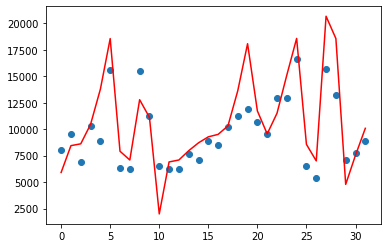

In [17]:
x_domain = np.arange(len(y_test))
plt.scatter(x_domain, y_test)
plt.plot(x_domain, y_pred2, 'r')